# milner lab redo

In [1]:
# Import all the things.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Config
SAVE_FIGS = False

In [3]:
# Helper funcs

def get_crests(df):
    points = df['Recording (a.u.)'].tolist() # Store a list of the points from the sample.
    crests = []
    ends_of_cycles = []

    for index, point in enumerate(points): # Go through each point one by one
        try:
            if point > 0 and points[index+1] < 0:
                ends_of_cycles.append(index)
        except IndexError:
            pass


    cycles = [sl.tolist() for sl in np.split(points, ends_of_cycles)][:-1]
    for cycle in cycles:
        crests.append(max(cycle))
    return crests

def less_lossy_avg_period(df, crests):
    first_crest_row = df.loc[df['Recording (a.u.)'] == crests[0]]
    first_crest_time = first_crest_row['Time (ms)'].values[0]

    last_crest_row = df.loc[df['Recording (a.u.)'] == crests[-1]]
    last_crest_time = last_crest_row['Time (ms)'].values[0]

    alt_total = (last_crest_time - first_crest_time) / (len(crests) - 1) / 1000
    return alt_total

def freq_from_period(p):
    return 1 / p

In [4]:
def lint_crests(samplename, c):
    if samplename == 'cuecard-t1':
        return [x for x in c if x > 0.05]
    if samplename == 'cuecard-t3':
        return [x for x in c if x > 0.1]
    if samplename == 'cuecard-t6':
        return [x for x in c if x > 0.02]
    if samplename == 'cuecard-t8':
        newc = np.array_split(c, 20)
        return [max(x) for x in newc]
    if samplename == 'cuecard-t9':
        newc = np.array_split(c, 20)
        return [max(x) for x in newc]
    if samplename == 'cuecard-t10':
        return [x for x in c if x > 0.004]
    if samplename == 'hexkey-t1':
        return [x for x in c if x > 0.01]
    if samplename == 'hexkey-t4':
        return [x for x in c if x > 0.02]
    if samplename == 'hexkey-t7':
        return [x for x in c if x > 0.05]
    if samplename == 'hexkey-t10':
        return [x for x in c if x > 0.1]
    if samplename == 'ruler-t2':
        return [x for x in c if x > 0.07]
    if samplename == 'ruler-t4':
        return [x for x in c if x > 0.05]
    if samplename == 'ruler-t5':
        return [x for x in c if x > 0.05]
    if samplename == 'ruler-t6':
        return [x for x in c if x > 0.05]
    if samplename == 'ruler-t7':
        return [x for x in c if x > 0.015]
    if samplename == 'ruler-t8':
        newc = [0.11386307328939438]
        newc.extend([None] * 18)
        newc.append(0.07866601645946503)
        return newc
    if samplename == 'ruler-t9':
        return [x for x in c if x > 0.05]
    if samplename == 'eraser-t1':
            c.pop(5)
            c.pop(7)
            return c
    if samplename == 'eraser-t3':
        return [x for x in c if x > 0.016033241525292397]
    return c

In [5]:
# Getting the frequencies using average periods for each wave:

def get_all_freqs(smpl):
    freqs = {}

    for item in smpl.keys():
        fr = smpl[item]
        c = get_crests(fr)
        c = lint_crests(item, c)
        p = less_lossy_avg_period(fr, c)
        print(f'Avg period of {item}: {p}')
        f = freq_from_period(p)
        print(f'Frequency of {item}: {f}')
        freqs[item] = f

    return freqs

In [6]:
def big_scary_plot(smpls):
    fig = plt.figure(figsize=[12,6])

    for frame in smpls.keys():
        fr = smpls[frame]
        plt.plot(fr['Time (ms)'], fr['Recording (a.u.)'])

    plt.legend(smpls.keys())
    plt.grid(visible=True)
    plt.show()

In [7]:
def plot_freqs(freqs, samples, ylim_bottom=None, ylim_top=None, material=""):
    fig = plt.figure(figsize=[12,6])

    set_stdev = np.std(list(freqs.values()))
    
    for item in freqs.keys():
        plt.bar(item, freqs[item], yerr=set_stdev, capsize=4)

    plt.legend(samples.keys())
    plt.grid(visible=True)
    plt.ylim(ylim_bottom, ylim_top)
    plt.title(f"Frequency of each {material} trial")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Trial #")
    plt.axhline(np.average(list(freqs.values())), color='red', linestyle='solid', linewidth=3)
    plt.show()
    fig.savefig(f"assets/{material}.png") if SAVE_FIGS else None

In [8]:
def plot_trial_dataframe(df, name=None):
    df.plot(
        x="Time (ms)",
        y="Recording (a.u.)",
        figsize=(12,6),
        grid=True,
        title=name,
        xlabel="Time (ms)",
        ylabel="Amplitude"
    )

In [9]:
SQRT_NUM_OF_TRIALS = np.sqrt(10)

def sem_of_dataset(freqs):
    stdev = np.std(freqs)
    sem = stdev / SQRT_NUM_OF_TRIALS
    return sem

## cuecard

In [10]:
cuecard_t1 = pd.read_excel('cuecard-t1.xls')
cuecard_t2 = pd.read_excel('cuecard-t2.xls')
cuecard_t3 = pd.read_excel('cuecard-t3.xls')
cuecard_t4 = pd.read_excel('cuecard-t4.xls')
cuecard_t5 = pd.read_excel('cuecard-t5.xls')
cuecard_t6 = pd.read_excel('cuecard-t6.xls')
cuecard_t7 = pd.read_excel('cuecard-t7.xls')
cuecard_t8 = pd.read_excel('cuecard-t8.xls')
cuecard_t9 = pd.read_excel('cuecard-t9.xls')
cuecard_t10 = pd.read_excel('cuecard-t10.xls')

In [11]:
CUECARD_SAMPLES = {
    'cuecard-t1': cuecard_t1,
    'cuecard-t2': cuecard_t2,
    'cuecard-t3': cuecard_t3,
    'cuecard-t4': cuecard_t4,
    'cuecard-t5': cuecard_t5,
    'cuecard-t6': cuecard_t6,
    'cuecard-t7': cuecard_t7,
    'cuecard-t8': cuecard_t8,
    'cuecard-t9': cuecard_t9,
    'cuecard-t10': cuecard_t10,
}

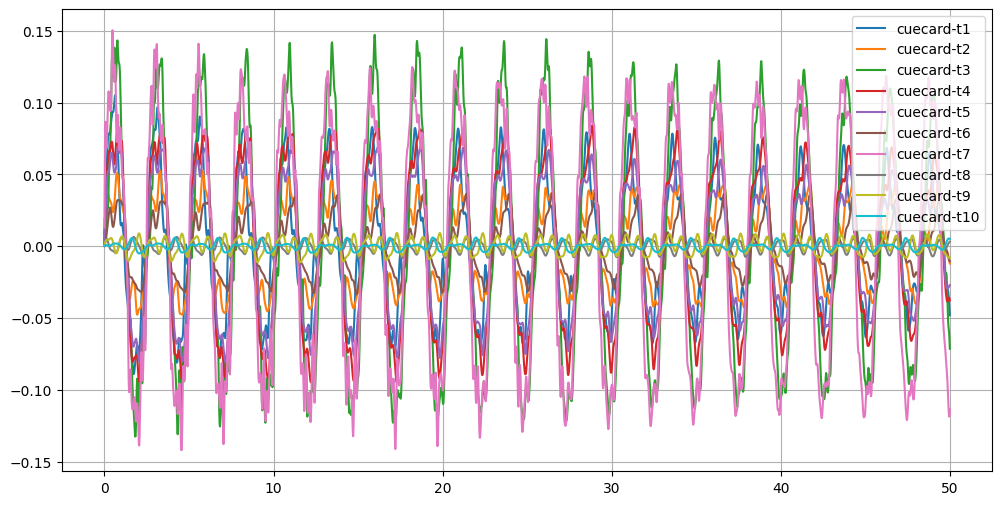

In [12]:
big_scary_plot(CUECARD_SAMPLES)

In [13]:
cuecard_freqs = get_all_freqs(CUECARD_SAMPLES)

Avg period of cuecard-t1: 0.0025329906834589046
Frequency of cuecard-t1: 394.7902400629671
Avg period of cuecard-t2: 0.0025571144042537512
Frequency of cuecard-t2: 391.065803835958
Avg period of cuecard-t3: 0.002537376814512513
Frequency of cuecard-t3: 394.10780231004924
Avg period of cuecard-t4: 0.00254066641280272
Frequency of cuecard-t4: 393.5975203044686
Avg period of cuecard-t5: 0.002541762945566122
Frequency of cuecard-t5: 393.42771982116216
Avg period of cuecard-t6: 0.0025549213387269475
Frequency of cuecard-t6: 391.40148263753383
Avg period of cuecard-t7: 0.0025395698800393177
Frequency of cuecard-t7: 393.76746742031685
Avg period of cuecard-t8: 0.002506673897137254
Frequency of cuecard-t8: 398.9350194862003
Avg period of cuecard-t9: 0.002454040324493952
Frequency of cuecard-t9: 407.49126655292844
Avg period of cuecard-t10: 0.0025417629455661214
Frequency of cuecard-t10: 393.4277198211622


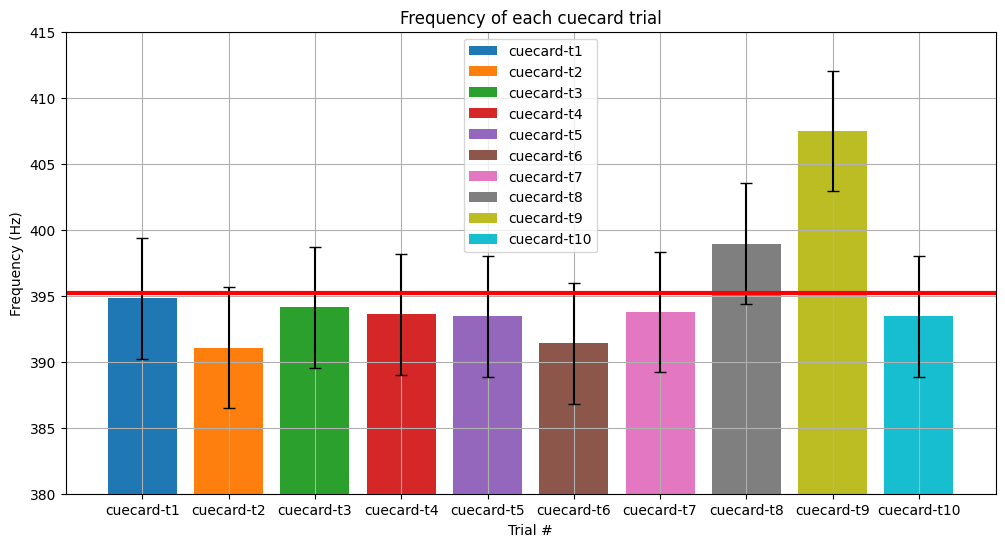

In [14]:
plot_freqs(cuecard_freqs, CUECARD_SAMPLES, ylim_bottom=380, ylim_top=415, material="cuecard")

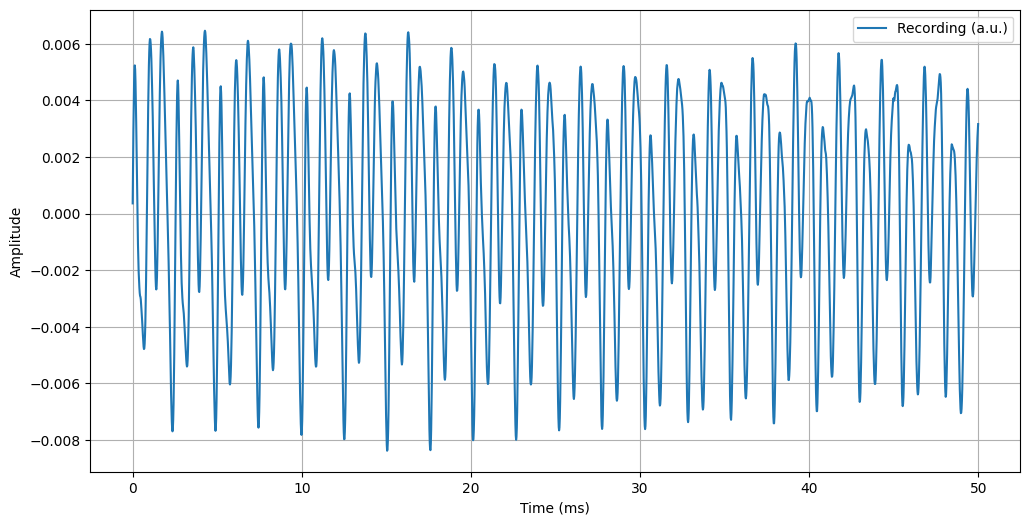

In [15]:
plot_trial_dataframe(cuecard_t8)

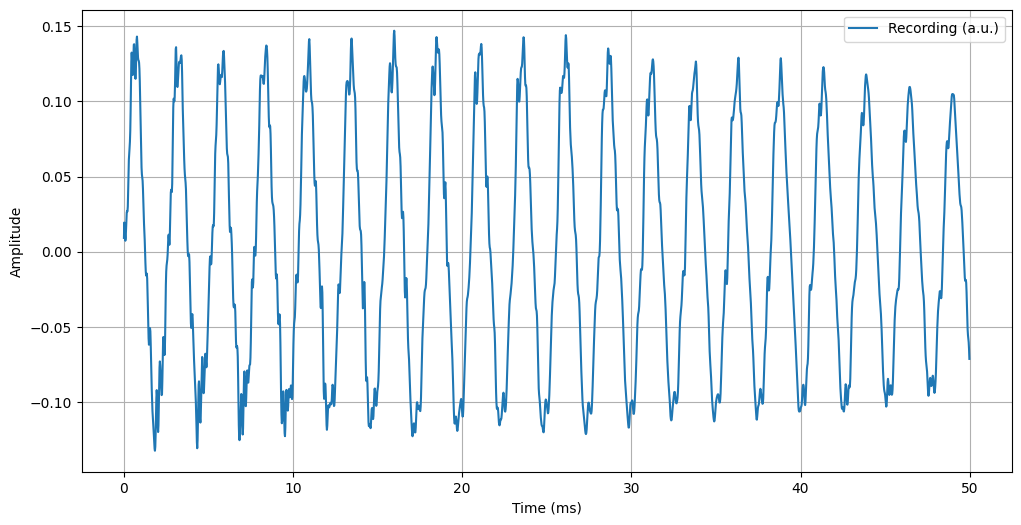

In [16]:
plot_trial_dataframe(cuecard_t3)

In [17]:
CUECARD_AVG = np.average(list(cuecard_freqs.values()))
CUECARD_AVG

395.20120422527464

## hexkey

In [18]:
hexkey_t1 = pd.read_excel('hexkey-t1.xls')
hexkey_t2 = pd.read_excel('hexkey-t2.xls')
hexkey_t3 = pd.read_excel('hexkey-t3.xls')
hexkey_t4 = pd.read_excel('hexkey-t4.xls')
hexkey_t5 = pd.read_excel('hexkey-t5.xls')
hexkey_t6 = pd.read_excel('hexkey-t6.xls')
hexkey_t7 = pd.read_excel('hexkey-t7.xls')
hexkey_t8 = pd.read_excel('hexkey-t8.xls')
hexkey_t9 = pd.read_excel('hexkey-t9.xls')
hexkey_t10 = pd.read_excel('hexkey-t10.xls')

In [19]:
HEXKEY_SAMPLES = {
    'hexkey-t1': hexkey_t1,
    'hexkey-t2': hexkey_t2,
    'hexkey-t3': hexkey_t3,
    'hexkey-t4': hexkey_t4,
    'hexkey-t5': hexkey_t5,
    'hexkey-t6': hexkey_t6,
    'hexkey-t7': hexkey_t7,
    'hexkey-t8': hexkey_t8,
    'hexkey-t9': hexkey_t9,
    'hexkey-t10': hexkey_t10,
}

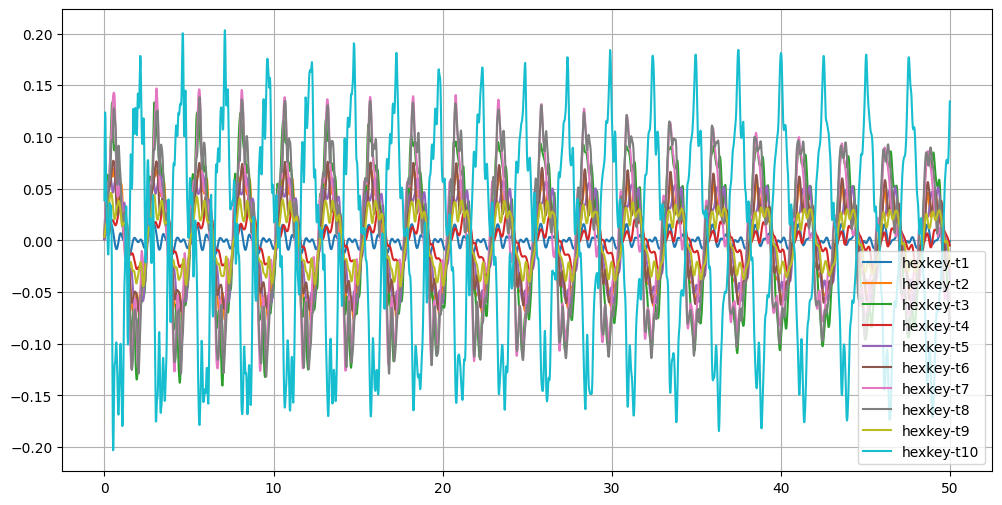

In [20]:
fig = plt.figure(figsize=[12,6])

for frame in HEXKEY_SAMPLES.keys():
    fr = HEXKEY_SAMPLES[frame]
    plt.plot(fr['Time (ms)'], fr['Recording (a.u.)'])

plt.legend(HEXKEY_SAMPLES.keys())
plt.grid(visible=True)
plt.show()

In [21]:
hexkey_freqs = get_all_freqs(HEXKEY_SAMPLES)

Avg period of hexkey-t1: 0.0025395698800393172
Frequency of hexkey-t1: 393.7674674203169
Avg period of hexkey-t2: 0.0025538248059635447
Frequency of hexkey-t2: 391.5695382333422
Avg period of hexkey-t3: 0.0025549213387269475
Frequency of hexkey-t3: 391.40148263753383
Avg period of hexkey-t4: 0.0025505352076733386
Frequency of hexkey-t4: 392.0745720315795
Avg period of hexkey-t5: 0.002554921338726947
Frequency of hexkey-t5: 391.4014826375339
Avg period of hexkey-t6: 0.002535183748985709
Frequency of hexkey-t6: 394.4487260144697
Avg period of hexkey-t7: 0.0025329906834589046
Frequency of hexkey-t7: 394.7902400629671
Avg period of hexkey-t8: 0.0025406664128027195
Frequency of hexkey-t8: 393.5975203044687
Avg period of hexkey-t9: 0.0025768519939949894
Frequency of hexkey-t9: 388.0704061895549
Avg period of hexkey-t10: 0.0025000947005568404
Frequency of hexkey-t10: 399.9848484848483


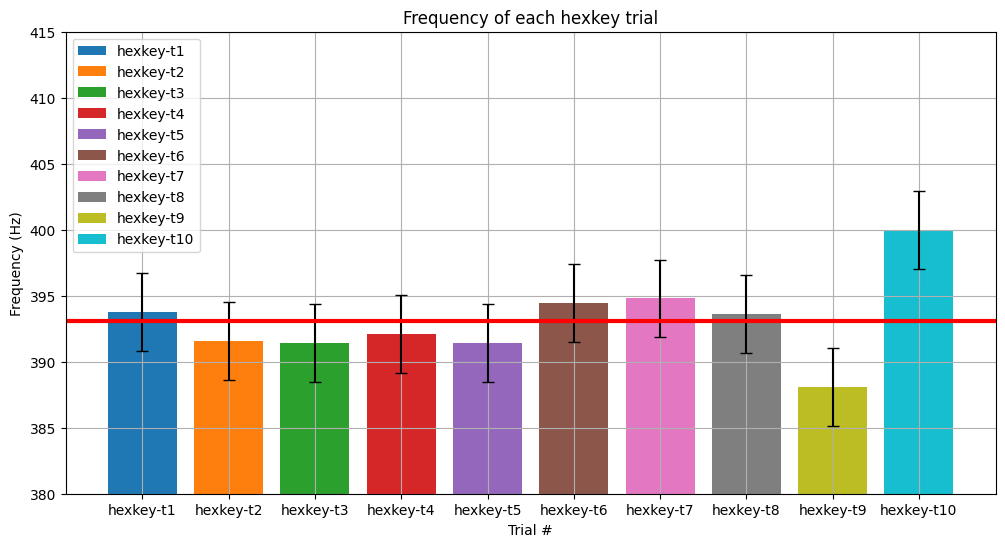

In [22]:
plot_freqs(hexkey_freqs, HEXKEY_SAMPLES, ylim_bottom=380, ylim_top=415, material="hexkey")

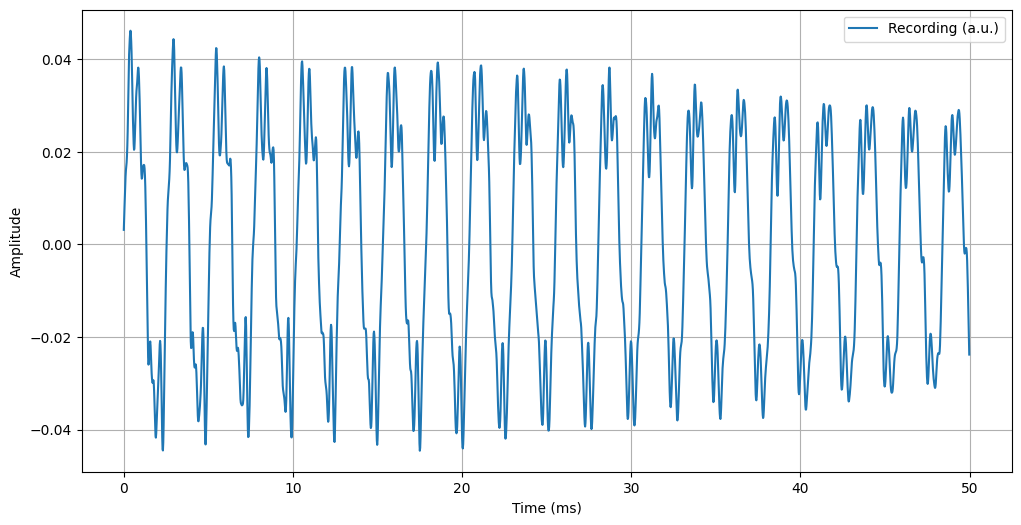

In [23]:
plot_trial_dataframe(hexkey_t9)

In [24]:
HEXKEY_AVG = np.average(list(hexkey_freqs.values()))
HEXKEY_AVG

393.11062840166153

## ruler

In [25]:
ruler_t1 = pd.read_excel('ruler-t1.xls')
ruler_t2 = pd.read_excel('ruler-t2.xls')
ruler_t3 = pd.read_excel('ruler-t3.xls')
ruler_t4 = pd.read_excel('ruler-t4.xls')
ruler_t5 = pd.read_excel('ruler-t5.xls')
ruler_t6 = pd.read_excel('ruler-t6.xls')
ruler_t7 = pd.read_excel('ruler-t7.xls')
ruler_t8 = pd.read_excel('ruler-t8.xls')
ruler_t9 = pd.read_excel('ruler-t9.xls')
ruler_t10 = pd.read_excel('ruler-t10.xls')

In [26]:
RULER_SAMPLES = {
    'ruler-t1': ruler_t1,
    'ruler-t2': ruler_t2,
    'ruler-t3': ruler_t3,
    'ruler-t4': ruler_t4,
    'ruler-t5': ruler_t5,
    'ruler-t6': ruler_t6,
    'ruler-t7': ruler_t7,
    'ruler-t8': ruler_t8,
    'ruler-t9': ruler_t9,
    'ruler-t10': ruler_t10,
}

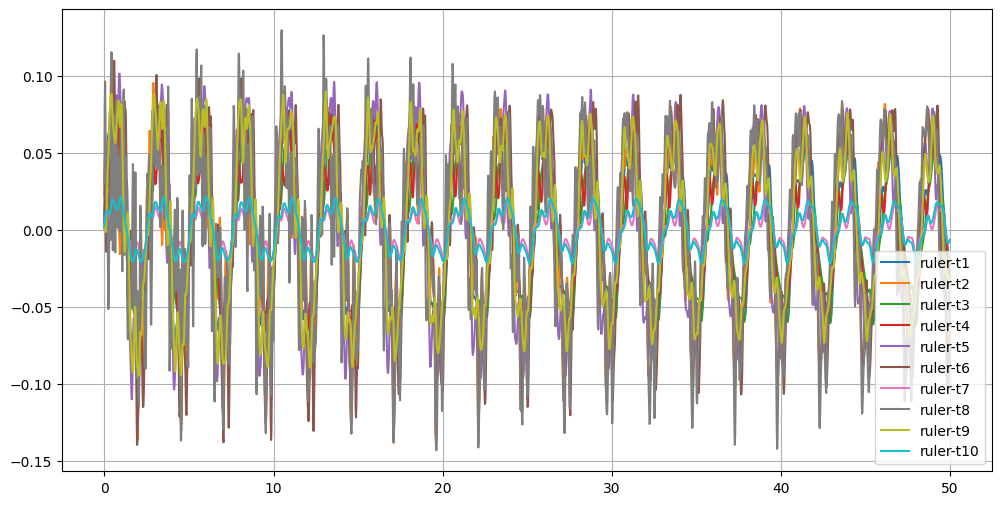

In [27]:
big_scary_plot(RULER_SAMPLES)

In [28]:
ruler_freqs = get_all_freqs(RULER_SAMPLES)

Avg period of ruler-t1: 0.0025571144042537512
Frequency of ruler-t1: 391.065803835958
Avg period of ruler-t2: 0.0025395698800393177
Frequency of ruler-t2: 393.76746742031685
Avg period of ruler-t3: 0.002559307469780556
Frequency of ruler-t3: 390.730700319389
Avg period of ruler-t4: 0.0025395698800393177
Frequency of ruler-t4: 393.76746742031685
Avg period of ruler-t5: 0.002529701085168698
Frequency of ruler-t5: 395.3036213894469
Avg period of ruler-t6: 0.00256150053530736
Frequency of ruler-t6: 390.3961706102114
Avg period of ruler-t7: 0.0025395698800393177
Frequency of ruler-t7: 393.76746742031685
Avg period of ruler-t8: 0.0025362802817491107
Frequency of ruler-t8: 394.2781904649607
Avg period of ruler-t9: 0.002556017871490349
Frequency of ruler-t9: 391.233571233571
Avg period of ruler-t10: 0.0025406664128027195
Frequency of ruler-t10: 393.5975203044687


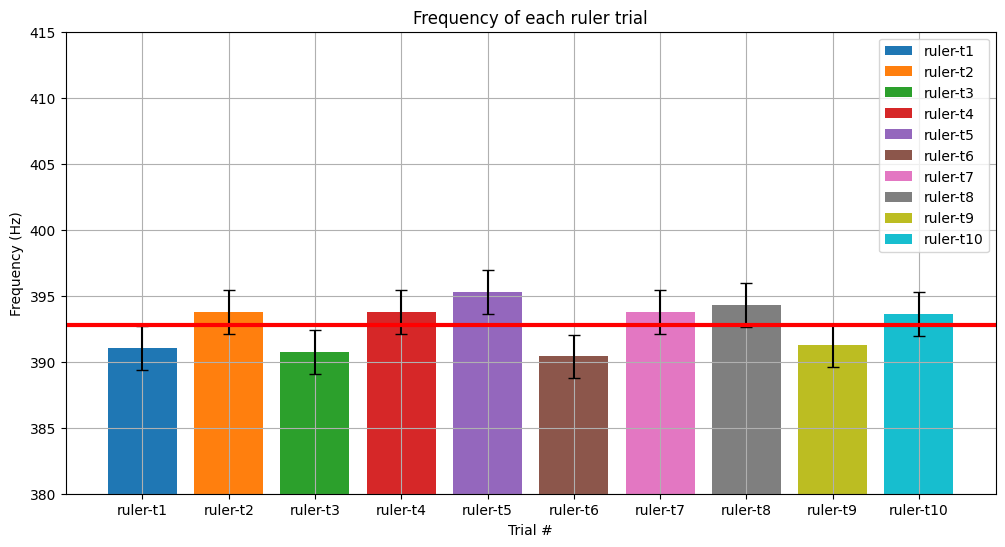

In [29]:
plot_freqs(ruler_freqs, RULER_SAMPLES, ylim_bottom=380, ylim_top=415, material="ruler")

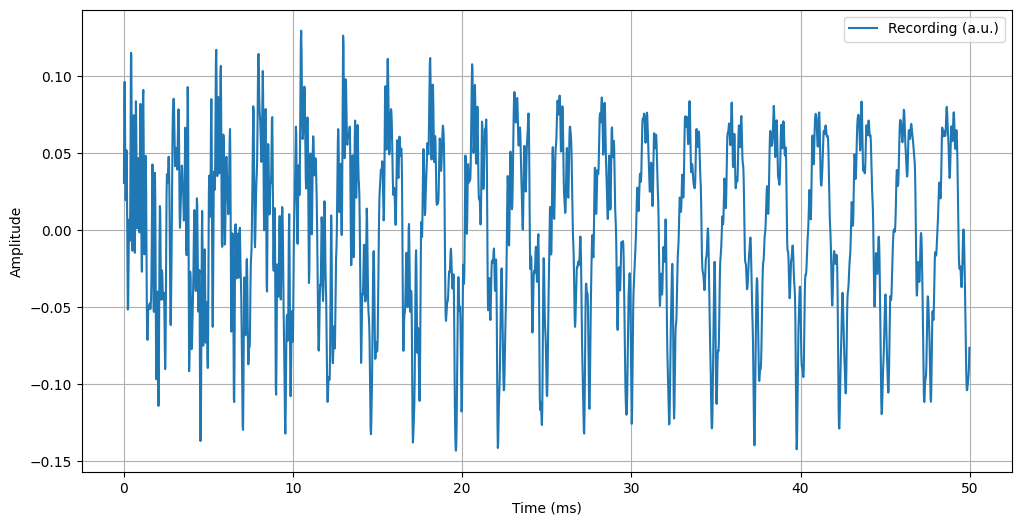

In [30]:
plot_trial_dataframe(ruler_t8)

In [31]:
RULER_AVG = np.average(list(ruler_freqs.values()))
RULER_AVG

392.79079804189564

## eraser

In [32]:
eraser_t1 = pd.read_excel('eraser-t1.xls')
eraser_t2 = pd.read_excel('eraser-t2.xls')
eraser_t3 = pd.read_excel('eraser-t3.xls')
eraser_t4 = pd.read_excel('eraser-t4.xls')
eraser_t5 = pd.read_excel('eraser-t5.xls')
eraser_t6 = pd.read_excel('eraser-t6.xls')
eraser_t7 = pd.read_excel('eraser-t7.xls')
eraser_t8 = pd.read_excel('eraser-t8.xls')
eraser_t9 = pd.read_excel('eraser-t9.xls')
eraser_t10 = pd.read_excel('eraser-t10.xls')

In [33]:
ERASER_SAMPLES = {
    'eraser-t1': eraser_t1,
    'eraser-t2': eraser_t2,
    'eraser-t3': eraser_t3,
    'eraser-t4': eraser_t4,
    'eraser-t5': eraser_t5,
    'eraser-t6': eraser_t6,
    'eraser-t7': eraser_t7,
    'eraser-t8': eraser_t8,
    'eraser-t9': eraser_t9,
    'eraser-t10': eraser_t10,
}

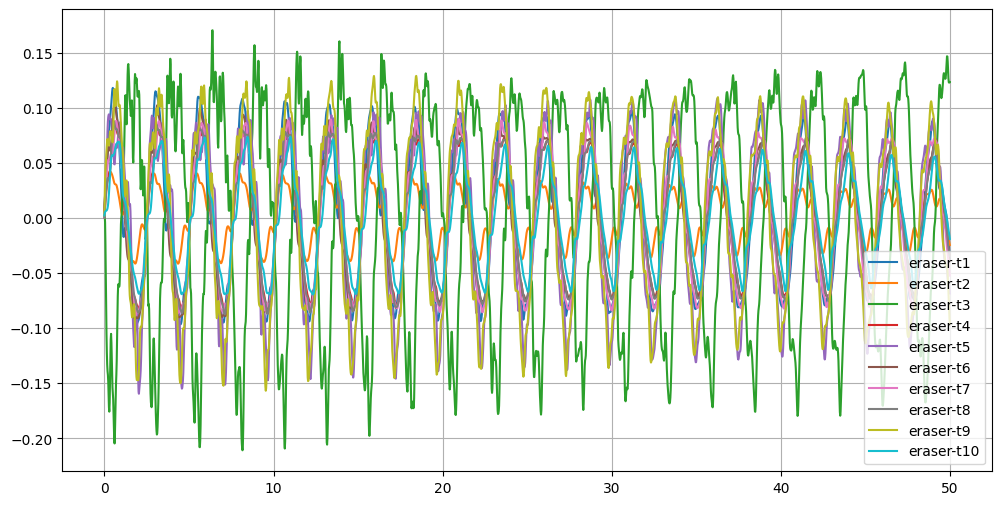

In [34]:
big_scary_plot(ERASER_SAMPLES)

In [35]:
eraser_freqs = get_all_freqs(ERASER_SAMPLES)

Avg period of eraser-t1: 0.0025505352076733386
Frequency of eraser-t1: 392.0745720315795
Avg period of eraser-t2: 0.002556017871490349
Frequency of eraser-t2: 391.233571233571
Avg period of eraser-t3: 0.0025510225555681835
Frequency of eraser-t3: 391.9996700214484
Avg period of eraser-t4: 0.0025538248059635447
Frequency of eraser-t4: 391.5695382333422
Avg period of eraser-t5: 0.002564790133597566
Frequency of eraser-t5: 389.895448715457
Avg period of eraser-t6: 0.002554921338726947
Frequency of eraser-t6: 391.4014826375339
Avg period of eraser-t7: 0.0025461490766197302
Frequency of eraser-t7: 392.74998042439876
Avg period of eraser-t8: 0.002554921338726947
Frequency of eraser-t8: 391.4014826375339
Avg period of eraser-t9: 0.0025329906834589046
Frequency of eraser-t9: 394.7902400629671
Avg period of eraser-t10: 0.0025384733472759153
Frequency of eraser-t10: 393.9375613587274


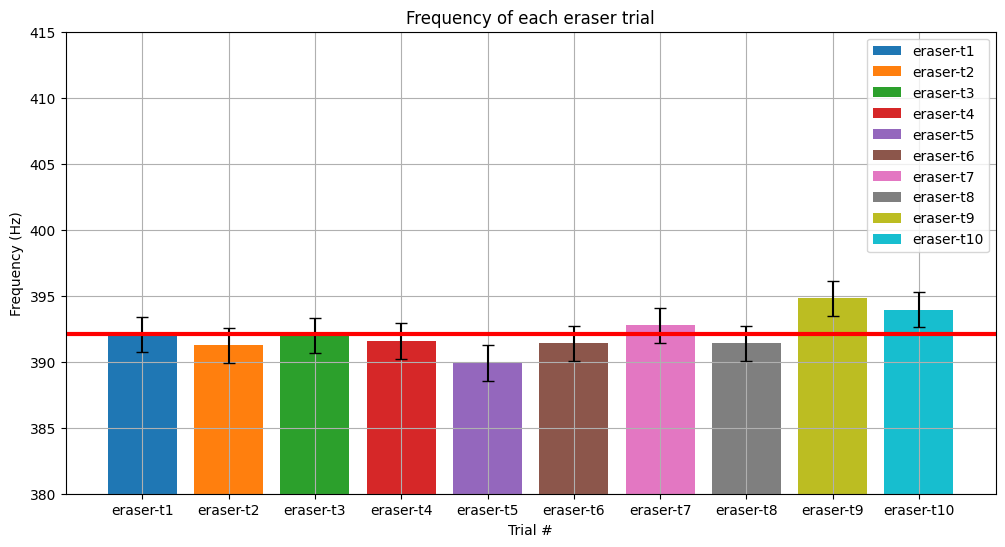

In [36]:
plot_freqs(eraser_freqs, ERASER_SAMPLES, ylim_bottom=380, ylim_top=415, material="eraser")

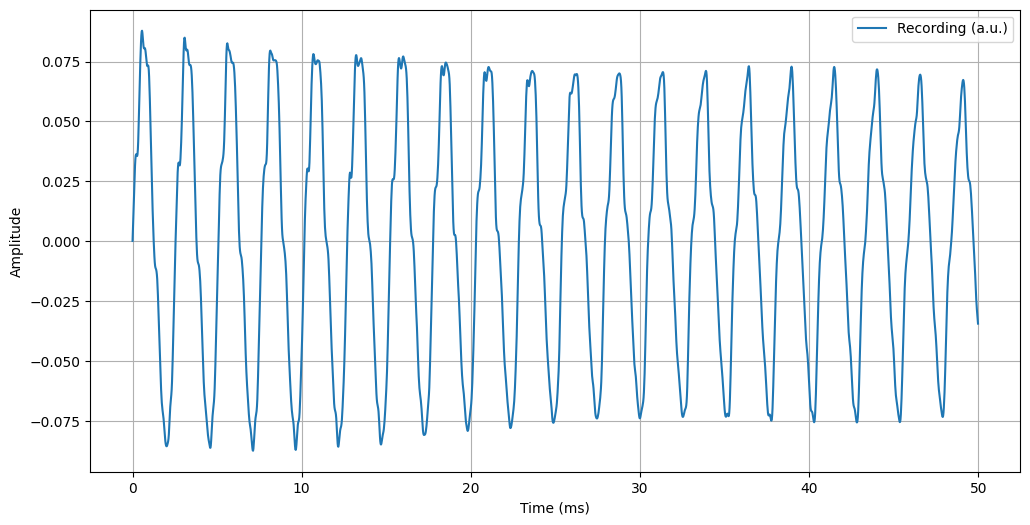

In [37]:
plot_trial_dataframe(eraser_t8)

In [38]:
ERASER_AVG = np.average(list(eraser_freqs.values()))
ERASER_AVG

392.10535473565585

## totals

In [39]:
ALL_FREQ_SETS = {
    'Cue card': list(cuecard_freqs.values()),
    'Hex key': list(hexkey_freqs.values()),
    'Ruler': list(ruler_freqs.values()),
    'Eraser': list(eraser_freqs.values())
}

ALL_AVGS = {
    'Cue card': CUECARD_AVG,
    'Hex key': HEXKEY_AVG,
    'Ruler': RULER_AVG,
    'Eraser': ERASER_AVG
}

AVG_VALS = np.average(list(ALL_AVGS.values()))

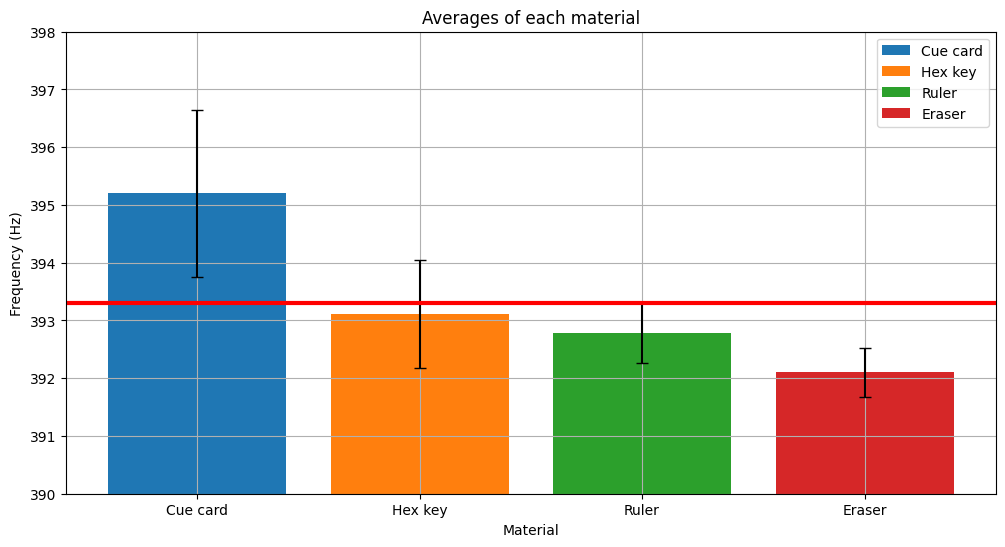

In [40]:
fig = plt.figure(figsize=[12,6])

for item in ALL_FREQ_SETS.keys():
    current_freqlist = ALL_FREQ_SETS[item]
    current_sem = sem_of_dataset(current_freqlist)
    plt.bar(item, ALL_AVGS[item], yerr=current_sem, capsize=4)

plt.legend(ALL_AVGS.keys())
plt.grid(visible=True)

# add avg line
plt.axhline(AVG_VALS, color='red', linestyle='solid', linewidth=3)
plt.title("Averages of each material")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Material")

# display
plt.ylim(390, 398)
fig.savefig("assets/all-avgs.png") if SAVE_FIGS else None
plt.show()

# uncertainty

Given that uncertainty is
$$
\frac{0.02}{N}
$$
where $N$ is the number of periods, and each wave has 20 periods, we can calculate uncertainty to be:

In [41]:
0.02 / 20

0.001